In [12]:
import numpy as np
import pylab as pl
from PIL import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Test

In [5]:
cemerg = np.load('../../../share/CEmergentFrame/first_take/1488764083877.npy')

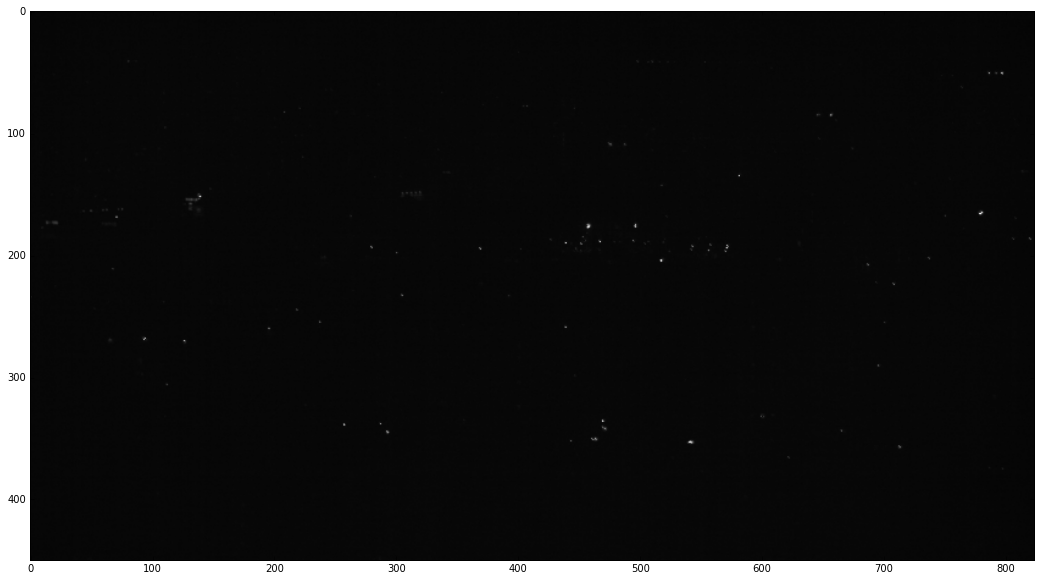

In [37]:
pl.figure(figsize=(18, 35))
pl.imshow(cemerg, cmap='gray')

## Stacking

In [34]:
import glob
import os


In [43]:
# list of files

filepattern = '../../../share/CEmergentFrame/first_take/148876408'
impath = "%s*.npy"%(filepattern)
flist = glob.glob(impath)
img = flist[0]

In [58]:
#get "rgb"

rgb = np.zeros((len(flist[:20]), 450, 824), np.uint8)

print rgb.shape

for i, f in enumerate(flist[:20]):
    try:
        # reads in raw images
        rgb[i] = np.fromfile(f, dtype=np.uint8).clip(0, 255).reshape(450, 824, 1).astype(float)

    except: pass

(20, 450, 824)


In [59]:
# stackem
stack = np.median(rgb, axis = 0).astype(np.uint8)

In [60]:
stack.shape

(450, 824)

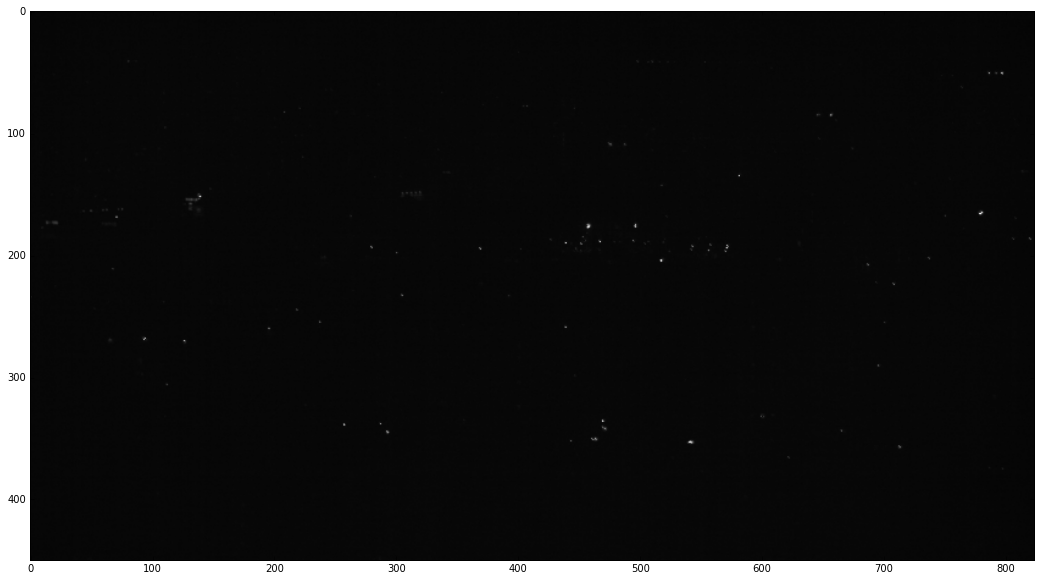

In [61]:
pl.figure(figsize=(18, 35))
pl.imshow(cemerg, cmap='gray')

../outputs_2/stacks/148876408_N20.png


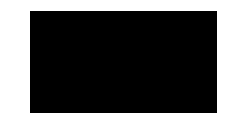

In [65]:
# outputs
OUTPUTDIR = '../outputs_2'

# saves the stack as a npy array file
np.save(OUTPUTDIR + '/stacks/%s_N%d.npy'%('148876408', 20), stack)

# saves the stack in a png
stackfig = pl.figure()
ax0 = stackfig.add_subplot(211)
ax0.imshow(stack.clip(0, 255).astype(np.uint8), interpolation= None, shape=(450,824), cmap='gray')
ax0.axis('off')

stackfig.savefig(OUTPUTDIR + '/stacks/%s_N%d.png'%('148876408', 20))
print(OUTPUTDIR + '/stacks/%s_N%d.png'%('148876408', 20))